In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import random
from sklearn import tree
from sklearn.metrics import classification_report
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
df = pd.read_csv('Data6/diabetes_prediction_dataset.csv')

In [8]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [9]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [10]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [11]:
df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [12]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [13]:
df.duplicated().sum()

3854

In [15]:
df =df.drop_duplicates(keep="first")

In [16]:
df['diabetes'].groupby(df['gender']) .mean()

gender
Female    0.079183
Male      0.100958
Other     0.000000
Name: diabetes, dtype: float64

In [17]:
df = df[df['gender'] != 'Other']

<Axes: xlabel='diabetes', ylabel='HbA1c_level'>

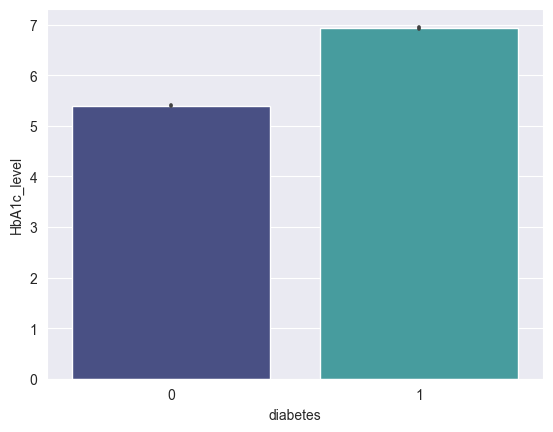

In [18]:
sns.barplot(x='diabetes', y='HbA1c_level', data=df,palette='mako')

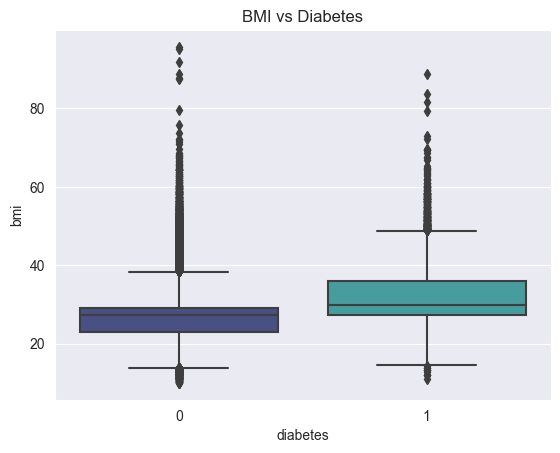

In [19]:
sns.boxplot(x='diabetes', y='bmi', data=df, palette='mako')
plt.title('BMI vs Diabetes')
plt.show()

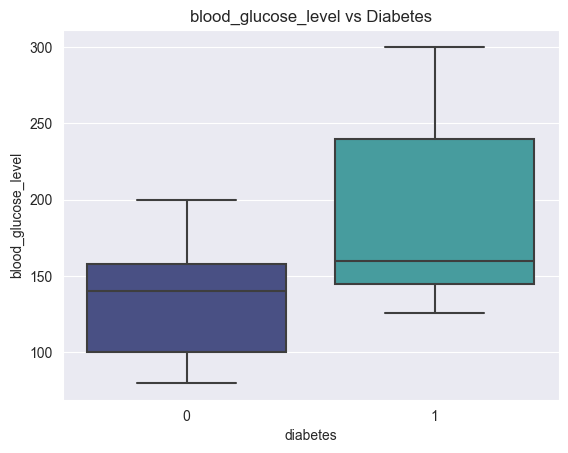

In [20]:
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df,palette='mako')
plt.title('blood_glucose_level vs Diabetes')
plt.show()

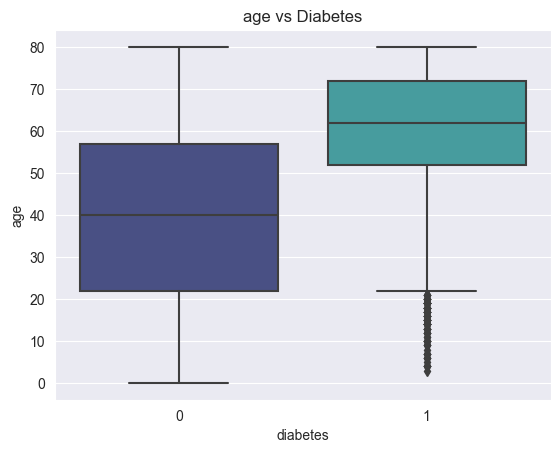

In [21]:
sns.boxplot(x='diabetes', y='age', data=df,palette='mako')
plt.title('age vs Diabetes')
plt.show()

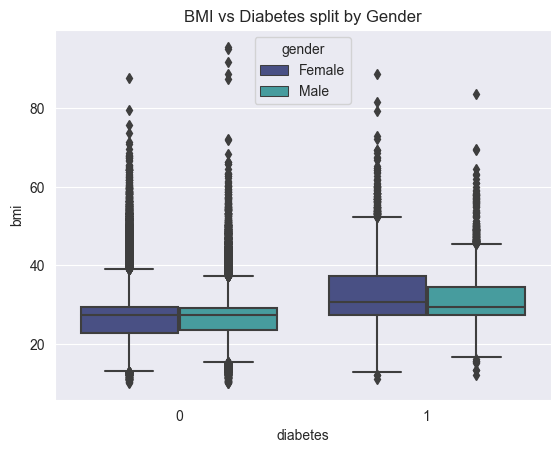

In [22]:
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=df,palette='mako')
plt.title('BMI vs Diabetes split by Gender')
plt.show()

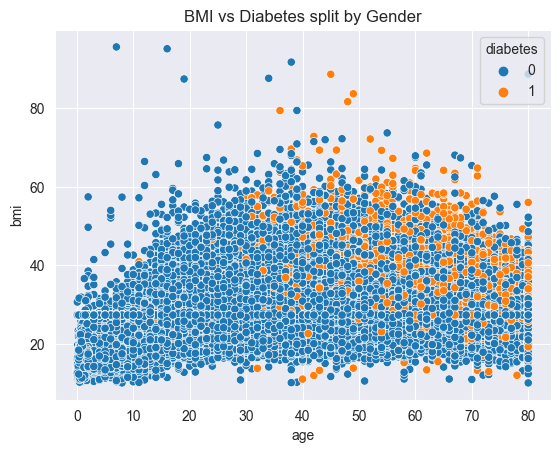

In [23]:
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df)
plt.title('BMI vs Diabetes split by Gender')
plt.show()

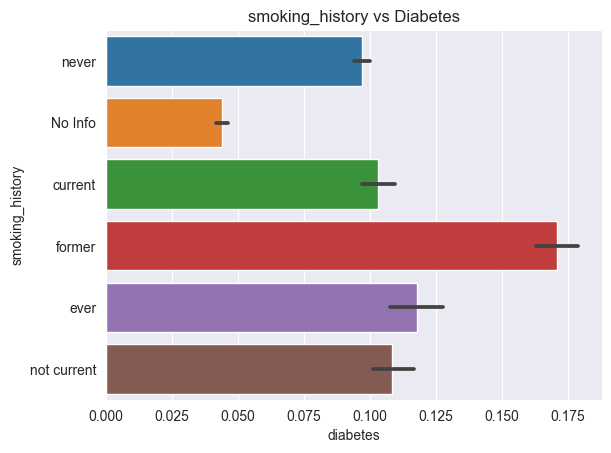

In [24]:
sns.barplot(x='diabetes', y='smoking_history', data=df)
plt.title('smoking_history vs Diabetes')
plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])
df['smoking_history'] = encoder.fit_transform(df['smoking_history'])
#encoder.fit_transform(df['gender'])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("diabetes", axis=1), df["diabetes"], test_size=0.2, random_state=42)

In [31]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(X_train, y_train)
model.

LGBMClassifier()

In [32]:
pred = model.predict(X_test)
print(pred)
accuracy = model.score(X_test, y_test)
print(accuracy)

[0 0 0 ... 0 0 0]
0.9694684281701862


In [33]:
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric="error",
    early_stopping_rounds=500,
    verbose=10,
)

C:\Users\bruce\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\bruce\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	valid_0's binary_error: 0.0307396	valid_0's binary_logloss: 0.129492
[20]	valid_0's binary_error: 0.0305836	valid_0's binary_logloss: 0.100485
[30]	valid_0's binary_error: 0.0305836	valid_0's binary_logloss: 0.0905975
[40]	valid_0's binary_error: 0.0302715	valid_0's binary_logloss: 0.0871754
[50]	valid_0's binary_error: 0.0303755	valid_0's binary_logloss: 0.0861778
[60]	valid_0's binary_error: 0.0302715	valid_0's binary_logloss: 0.0858499
[70]	valid_0's binary_error: 0.0304796	valid_0's binary_logloss: 0.0855943
[80]	valid_0's binary_error: 0.0305316	valid_0's binary_logloss: 0.0857536
[90]	valid_0's binary_error: 0.0305836	valid_0's binary_logloss: 0.0860072
[100]	valid_0's binary_error: 0.0305316	valid_0's binary_logloss: 0.0861206


LGBMClassifier()

In [30]:
print("Model validation accuracy: %.2f%%" % (model.score(X_test, y_test) * 100))

Model validation accuracy: 96.98%


In [34]:
import pickle
file = 'model_kaggle_6.pkl'
pickle.dump(model, open(file, 'wb'))
print('Trained LGB model was saved!')

Trained LGB model was saved!
